In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_MVCC = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
df_MVCV = pd.read_csv("Motor_Vehicle_Collisions_-_Vehicles.csv")

C:\Users\怀、\AppData\Local\Temp\ipykernel_20320\3310234737.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_MVCC = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
C:\Users\怀、\AppData\Local\Temp\ipykernel_20320\3310234737.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_MVCV = pd.read_csv("Motor_Vehicle_Collisions_-_Vehicles.csv")


In [3]:
df_MVCC.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
df_MVCV.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2'],
      dtype='object')

In [5]:
for col in df_MVCC.columns:
    types = df_MVCC[col].map(type).value_counts()
    if len(types) > 1:
        # print(f"{col}")
        print(types)
        print("-" * 40)

BOROUGH
<class 'str'>      1501047
<class 'float'>     670850
Name: count, dtype: int64
----------------------------------------
ZIP CODE
<class 'float'>    1774231
<class 'str'>       397666
Name: count, dtype: int64
----------------------------------------
LOCATION
<class 'str'>      1932014
<class 'float'>     239883
Name: count, dtype: int64
----------------------------------------
ON STREET NAME
<class 'str'>      1703323
<class 'float'>     468574
Name: count, dtype: int64
----------------------------------------
CROSS STREET NAME
<class 'str'>      1343126
<class 'float'>     828771
Name: count, dtype: int64
----------------------------------------
OFF STREET NAME
<class 'float'>    1795697
<class 'str'>       376200
Name: count, dtype: int64
----------------------------------------
CONTRIBUTING FACTOR VEHICLE 1
<class 'str'>      2164397
<class 'float'>       7500
Name: count, dtype: int64
----------------------------------------
CONTRIBUTING FACTOR VEHICLE 2
<class 'str'>     

In [6]:
for col in df_MVCV.columns:
    types = df_MVCV[col].map(type).value_counts()
    if len(types) > 1:
        # print(f"{col}")
        print(types)
        print("-" * 40)

STATE_REGISTRATION
<class 'str'>      4022458
<class 'float'>     335978
Name: count, dtype: int64
----------------------------------------
VEHICLE_TYPE
<class 'str'>      4100599
<class 'float'>     257837
Name: count, dtype: int64
----------------------------------------
VEHICLE_MAKE
<class 'str'>      2442278
<class 'float'>    1916158
Name: count, dtype: int64
----------------------------------------
VEHICLE_MODEL
<class 'float'>    4307056
<class 'str'>        51380
Name: count, dtype: int64
----------------------------------------
TRAVEL_DIRECTION
<class 'str'>      2678520
<class 'float'>    1679916
Name: count, dtype: int64
----------------------------------------
DRIVER_SEX
<class 'float'>    2281546
<class 'str'>      2076890
Name: count, dtype: int64
----------------------------------------
DRIVER_LICENSE_STATUS
<class 'float'>    2379262
<class 'str'>      1979174
Name: count, dtype: int64
----------------------------------------
DRIVER_LICENSE_JURISDICTION
<class 'float'> 

In [7]:
df_MVCC.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [8]:
crash_cols = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']

df_crash = df_MVCC[crash_cols].copy()

df_crash['CRASH DATE'] = pd.to_datetime(df_crash['CRASH DATE'], errors='coerce')
df_crash = df_crash[
    (df_crash['CRASH DATE'] >= '2024-01-01') &
    (df_crash['CRASH DATE'] < '2025-05-01')
]

df_crash = df_crash.dropna(subset=['LATITUDE', 'LONGITUDE'])
df_crash

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
1925,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,0,1,0,0,0,4761266
2964,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,0,0,0,0,0,4803256
4723,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",0.0,0.0,0,0,0,0,0,0,4757494
10590,2024-02-02,8:40,NaN,NaN,40.651268,-73.971810,"(40.651268, -73.97181)",0.0,0.0,0,0,0,0,0,0,4699637
10593,2024-04-27,21:00,BRONX,10459.0,40.824760,-73.893880,"(40.82476, -73.89388)",0.0,0.0,0,0,0,0,0,0,4721649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171892,2025-04-22,14:03,BROOKLYN,11217.0,40.678640,-73.973510,"(40.67864, -73.97351)",1.0,0.0,0,0,0,0,1,0,4808256
2171893,2025-04-12,15:15,BROOKLYN,11205.0,40.690907,-73.955414,"(40.690907, -73.955414)",0.0,0.0,0,0,0,0,0,0,4808121
2171894,2025-04-15,20:00,NaN,NaN,40.653416,-73.740974,"(40.653416, -73.740974)",0.0,0.0,0,0,0,0,0,0,4808708
2171895,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,0,0,0,0,0,4807986


In [9]:
print(df_crash.columns.tolist())

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID']


In [10]:
df_MVCV.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN


In [11]:
vehicle_cols = ['COLLISION_ID', 'CRASH_DATE', 'VEHICLE_TYPE']

df_vehicle = df_MVCV[vehicle_cols].copy()

df_vehicle['CRASH_DATE'] = pd.to_datetime(df_vehicle['CRASH_DATE'], errors='coerce')

df_vehicle = df_vehicle[
    (df_vehicle['CRASH_DATE'] >= '2024-01-01') &
    (df_vehicle['CRASH_DATE'] < '2025-05-01')
]

df_vehicle_clean = df_vehicle.drop(columns=['CRASH_DATE'])
df_vehicle_clean

,COLLISION_ID,VEHICLE_TYPE
2855,4707803,Sedan
3014,4707487,Sedan
3415,4709813,Bus
3845,4710425,NaN
5034,4709890,E-Scooter
...,...,...
4358431,4808346,NaN
4358432,4805883,Pick-up Truck
4358433,4807730,Sedan
4358434,4807921,Pick-up Truck


In [12]:
print(df_vehicle.columns.tolist())

['COLLISION_ID', 'CRASH_DATE', 'VEHICLE_TYPE']


In [13]:
df_merged = pd.merge(df_crash, df_vehicle_clean, on='COLLISION_ID', how='left')
df_merged

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE_TYPE
0,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,0,1,0,0,0,4761266,Bike
1,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,0,1,0,0,0,4761266,E-Bike
2,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,0,0,0,0,0,4803256,Ambulance
3,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,0,0,0,0,0,4803256,NaN
4,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",0.0,0.0,0,0,0,0,0,0,4757494,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217097,2025-04-15,20:00,NaN,NaN,40.653416,-73.740974,"(40.653416, -73.740974)",0.0,0.0,0,0,0,0,0,0,4808708,Pick-up Truck
217098,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,0,0,0,0,0,4807986,Bus
217099,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,0,0,0,0,0,4807986,Pick-up Truck
217100,2025-04-23,6:25,MANHATTAN,10009.0,40.731518,-73.974330,"(40.731518, -73.97433)",0.0,0.0,0,0,0,0,0,0,4807808,Sedan


In [14]:
print(df_merged.columns.tolist())

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'VEHICLE_TYPE']


In [15]:
df_merged['dayofweek'] = pd.to_datetime(df_merged['CRASH DATE']).dt.dayofweek

df_merged['hour'] = pd.to_datetime(df_merged['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour


In [16]:
df_merged['peak_status'] = 'off_peak' 

weekday_peak = (df_merged['dayofweek'] <= 4) & (df_merged['hour'] >= 5) & (df_merged['hour'] < 21)
weekend_peak = (df_merged['dayofweek'] > 4) & (df_merged['hour'] >= 9) & (df_merged['hour'] < 21)

df_merged.loc[weekday_peak | weekend_peak, 'peak_status'] = 'peak'

In [17]:
gdf_crf = gpd.read_file("congestion_zone.shp")
gdf_crf = gdf_crf.to_crs(epsg=2260) 

gdf_crash = gpd.GeoDataFrame(
    df_merged,
    geometry=gpd.points_from_xy(df_merged['LONGITUDE'], df_merged['LATITUDE']),
    crs="EPSG:4326"  
).to_crs(gdf_crf.crs)

gdf_crash['in_crf'] = gdf_crash.geometry.within(gdf_crf.union_all()).astype(int)

df_crash_with_crf = pd.DataFrame(gdf_crash.drop(columns='geometry'))


In [18]:
df_crash_with_crf

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE_TYPE,dayofweek,hour,peak_status,in_crf
0,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,...,1,0,0,0,4761266,Bike,5,12,peak,0
1,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,...,1,0,0,0,4761266,E-Bike,5,12,peak,0
2,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,...,0,0,0,0,4803256,Ambulance,2,9,peak,0
3,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,...,0,0,0,0,4803256,NaN,2,9,peak,0
4,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",0.0,0.0,0,...,0,0,0,0,4757494,NaN,5,1,off_peak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217097,2025-04-15,20:00,NaN,NaN,40.653416,-73.740974,"(40.653416, -73.740974)",0.0,0.0,0,...,0,0,0,0,4808708,Pick-up Truck,1,20,peak,0
217098,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,...,0,0,0,0,4807986,Bus,3,0,off_peak,0
217099,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,...,0,0,0,0,4807986,Pick-up Truck,3,0,off_peak,0
217100,2025-04-23,6:25,MANHATTAN,10009.0,40.731518,-73.974330,"(40.731518, -73.97433)",0.0,0.0,0,...,0,0,0,0,4807808,Sedan,2,6,peak,1


In [19]:
print(df_crash_with_crf.columns.tolist())

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'COLLISION_ID', 'VEHICLE_TYPE', 'dayofweek', 'hour', 'peak_status', 'in_crf']


In [20]:
df_crash_with_crf['CRASH DATE'] = pd.to_datetime(df_crash_with_crf['CRASH DATE'], errors='coerce')
latest_date = df_crash_with_crf['CRASH DATE'].max()
print(latest_date)

2025-04-25 00:00:00


In [21]:
df_crash_with_crf['period'] = df_crash_with_crf['CRASH DATE'].apply(
    lambda x: 'pre' if '2024-01-07' <= x.strftime('%Y-%m-%d') <= '2024-04-25'
    else ('post' if '2025-01-05' <= x.strftime('%Y-%m-%d') <= '2025-04-24' else None)
)
df_crash_with_crf

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE_TYPE,dayofweek,hour,peak_status,in_crf,period
0,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,...,0,0,0,4761266,Bike,5,12,peak,0,None
1,2024-10-05,12:40,NaN,NaN,40.642540,-73.876520,"(40.64254, -73.87652)",2.0,0.0,0,...,0,0,0,4761266,E-Bike,5,12,peak,0,None
2,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,...,0,0,0,4803256,Ambulance,2,9,peak,0,post
3,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",0.0,0.0,0,...,0,0,0,4803256,NaN,2,9,peak,0,post
4,2024-09-21,1:32,NaN,NaN,40.747974,-73.759990,"(40.747974, -73.75999)",0.0,0.0,0,...,0,0,0,4757494,NaN,5,1,off_peak,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217097,2025-04-15,20:00,NaN,NaN,40.653416,-73.740974,"(40.653416, -73.740974)",0.0,0.0,0,...,0,0,0,4808708,Pick-up Truck,1,20,peak,0,post
217098,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,...,0,0,0,4807986,Bus,3,0,off_peak,0,post
217099,2025-04-24,0:00,BROOKLYN,11211.0,40.712784,-73.937250,"(40.712784, -73.93725)",0.0,0.0,0,...,0,0,0,4807986,Pick-up Truck,3,0,off_peak,0,post
217100,2025-04-23,6:25,MANHATTAN,10009.0,40.731518,-73.974330,"(40.731518, -73.97433)",0.0,0.0,0,...,0,0,0,4807808,Sedan,2,6,peak,1,post


In [22]:
summary = df_crash_with_crf[
    df_crash_with_crf['period'].isin(['pre', 'post'])
].groupby(['period', 'in_crf', 'peak_status']).size().unstack()

summary


peak_status    off_peak   peak
period in_crf                 
post   0          11431  31985
       1            869   2432
pre    0          12713  33919
       1           1080   2673

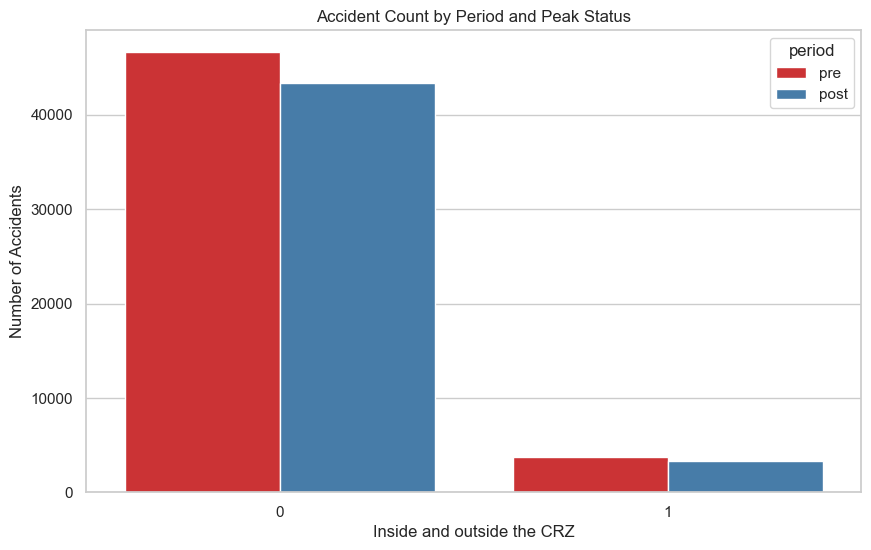

In [68]:
sns.set(style="whitegrid")

plot_data = df_crash_with_crf[df_crash_with_crf['period'].isin(['pre', 'post'])]

plt.figure(figsize=(10, 6))

sns.countplot(
    data=plot_data, 
    x='in_crf', 
    hue='period', 
    palette='Set1',
    dodge=True
)
plt.title("Accident Count by Period and Peak Status")
plt.ylabel("Number of Accidents")
plt.xlabel("Inside and outside the CRZ")
plt.show()


In [69]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_crash_with_crf['in_crf'], df_crash_with_crf['period'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


Chi-square value: 5.2132264951813365
Degrees of freedom: 1
P-value: 0.02241569884453608


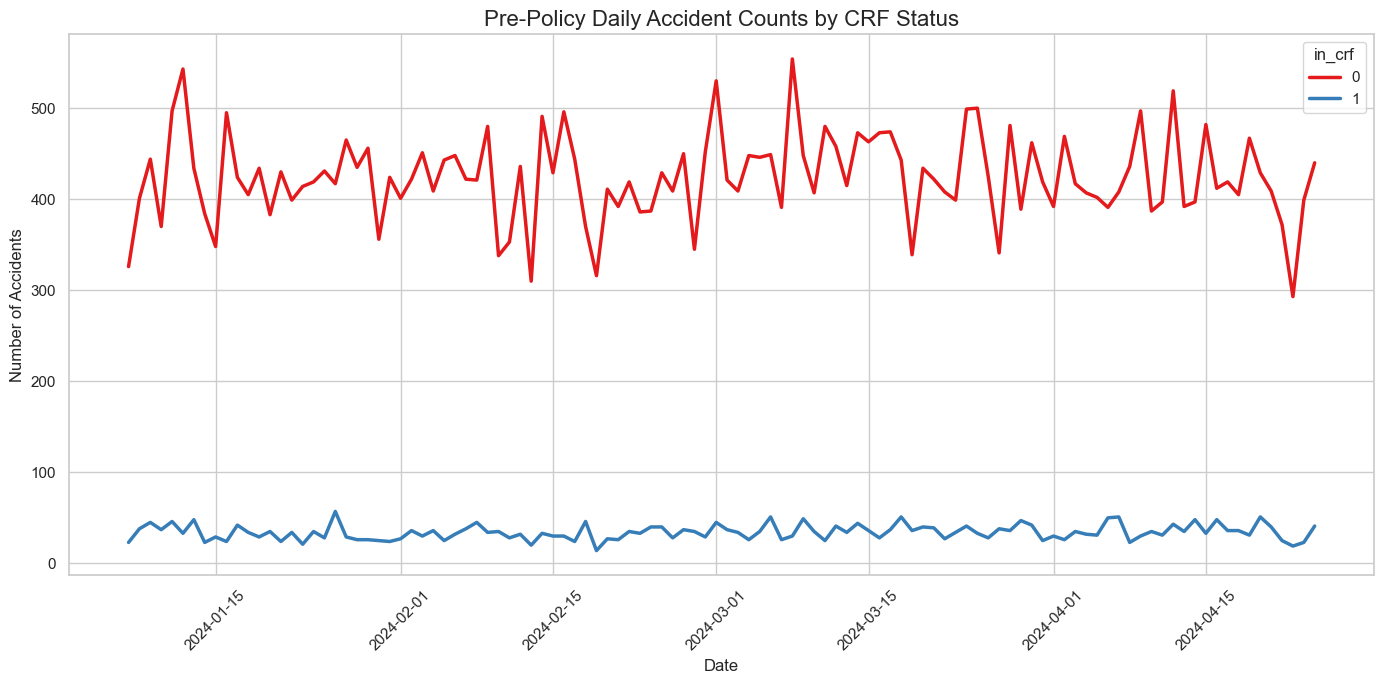

In [74]:
pre_data = df_crash_with_crf[df_crash_with_crf['period'] == 'pre'].copy()
pre_data['CRASH DATE'] = pd.to_datetime(pre_data['CRASH DATE'])
pre_data['day'] = pre_data['CRASH DATE'].dt.date

daily_counts = pre_data.groupby(['day', 'in_crf'])['count'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, x='day', y='count', hue='in_crf', linewidth=2.5, palette='Set1')
plt.title("Pre-Policy Daily Accident Counts by CRF Status", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
import statsmodels.formula.api as smf

pre_data = df_crash_with_crf[df_crash_with_crf['period'] == 'pre'].copy()
pre_data['CRASH DATE'] = pd.to_datetime(pre_data['CRASH DATE'])
pre_data['day'] = pre_data['CRASH DATE'].dt.date
pre_data['day_num'] = (pre_data['CRASH DATE'] - pre_data['CRASH DATE'].min()).dt.days

daily_counts = pre_data.groupby(['day_num', 'in_crf'])['count'].sum().reset_index()
model = smf.ols('count ~ day_num * in_crf', data=daily_counts).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2321.
Date:                Mon, 05 May 2025   Prob (F-statistic):          5.45e-164
Time:                        19:20:31   Log-Likelihood:                -1090.1
No. Observations:                 220   AIC:                             2188.
Df Residuals:                     216   BIC:                             2202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        422.0555      6.562     64.

In [57]:
df_crash_with_crf['CRASH DATE'] = pd.to_datetime(df_crash_with_crf['CRASH DATE'])

df_crash_with_crf['count'] = 1

daily_crash = df_crash_with_crf.groupby(['CRASH DATE', 'period', 'in_crf'])['count'].sum().reset_index()
daily_crash.rename(columns={'CRASH DATE': 'date'}, inplace=True)


In [55]:
daily_crash['year'] = daily_crash['date'].dt.year

daily_crash = daily_crash.sort_values(['year', 'date'])

daily_crash['day_number'] = daily_crash.groupby('year').cumcount() + 1


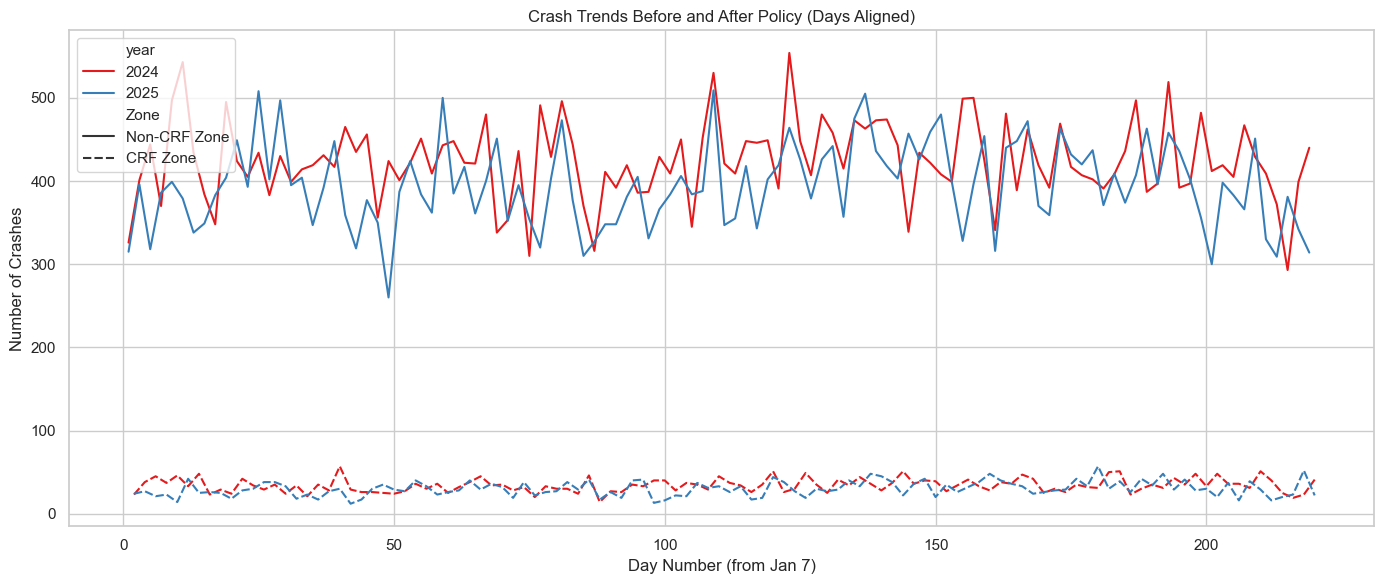

In [56]:
daily_crash['Zone'] = daily_crash['in_crf'].map({1: 'CRF Zone', 0: 'Non-CRF Zone'})

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=daily_crash,
    x='day_number',
    y='count',
    hue='year',
    style='Zone',
    palette='Set1'
)

plt.xlabel('Day Number (from Jan 7)')
plt.ylabel('Number of Crashes')
plt.title('Crash Trends Before and After Policy (Days Aligned)')
plt.legend()
plt.tight_layout()
plt.show()


In [77]:
daily_crash['post'] = daily_crash['period'].apply(lambda x: 1 if x == 'post' else 0)
daily_crash['crf'] = daily_crash['in_crf']
# DiD interaction term
daily_crash['post_x_crf'] = daily_crash['post'] * daily_crash['crf']


In [78]:
import statsmodels.formula.api as smf

model = smf.ols('count ~ post + crf + post_x_crf', data=daily_crash).fit(cov_type='HC1')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     4157.
Date:                Mon, 05 May 2025   Prob (F-statistic):          2.89e-320
Time:                        19:27:37   Log-Likelihood:                -2194.2
No. Observations:                 440   AIC:                             4396.
Df Residuals:                     436   BIC:                             4413.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    423.9273      4.585     92.460      0.0

In [79]:
daily_triplediff = df_crash_with_crf.groupby(
    ['CRASH DATE', 'period', 'in_crf', 'peak_status']
).size().reset_index(name='count')

daily_triplediff.rename(columns={'CRASH DATE': 'date'}, inplace=True)


In [80]:
daily_triplediff['post'] = (daily_triplediff['period'] == 'post').astype(int)
daily_triplediff['crf'] = daily_triplediff['in_crf']
daily_triplediff['peak'] = (daily_triplediff['peak_status'] == 'peak').astype(int)


In [81]:
daily_triplediff['post_x_crf'] = daily_triplediff['post'] * daily_triplediff['crf']
daily_triplediff['post_x_peak'] = daily_triplediff['post'] * daily_triplediff['peak']
daily_triplediff['crf_x_peak'] = daily_triplediff['crf'] * daily_triplediff['peak']
daily_triplediff['post_x_crf_x_peak'] = daily_triplediff['post'] * daily_triplediff['crf'] * daily_triplediff['peak']


In [82]:
import statsmodels.formula.api as smf

model = smf.ols(
    'count ~ post + crf + peak + post_x_crf + post_x_peak + crf_x_peak + post_x_crf_x_peak',
    data=daily_triplediff
).fit(cov_type='HC1')

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     753.3
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        19:27:40   Log-Likelihood:                -4515.4
No. Observations:                 876   AIC:                             9047.
Df Residuals:                     868   BIC:                             9085.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           115.5727      5.11

In [25]:
df = df_crash_with_crf.copy()

grouped = df.groupby(['peak_status', 'in_crf', 'period'])[
    [
        'NUMBER OF PERSONS INJURED',
        'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF CYCLIST INJURED',
        'NUMBER OF MOTORIST INJURED'
    ]
].agg(['sum']).round(2)

grouped

NUMBER OF PERSONS INJURED NUMBER OF PERSONS KILLED  \
                                                sum                      sum   
peak_status in_crf period                                                      
off_peak    0      post                      6550.0                     28.0   
                   pre                       7187.0                     62.0   
            1      post                       428.0                      4.0   
                   pre                        485.0                      3.0   
peak        0      post                     17705.0                     61.0   
                   pre                      19330.0                     71.0   
            1      post                      1057.0                      2.0   
                   pre                       1182.0                      1.0   

                          NUMBER OF PEDESTRIANS INJURED  \
                                                    sum   
peak_status in_crf period                                 
off_peak    0      post                             449   
                   pre                              438   
            1      post                              67   
                   pre                               60   
peak        0      post                            2099   
                   pre                             2175   
            1      post                             221   
                   pre                              216   

                          NUMBER OF CYCLIST INJURED NUMBER OF MOTORIST INJURED  
                                                sum                        sum  
peak_status in_crf period                                                       
off_peak    0      post                         320                       5673  
                   pre                          340                       6269  
            1      post                          87                        270  
                   pre                           70                        339  
peak        0      post                        1283                      13845  
                   pre                         1432                      15079  
            1      post                         289                        509  
                   pre                          338                        587

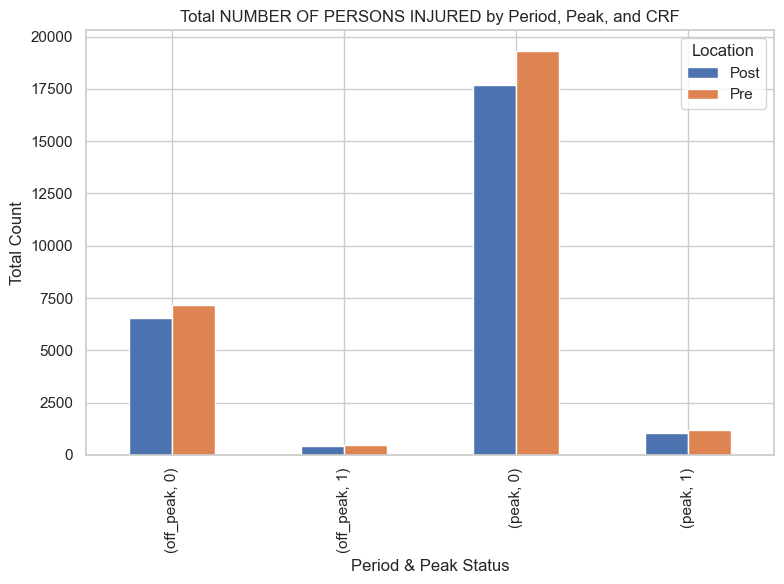

In [26]:
metric = 'NUMBER OF PERSONS INJURED'
df_plot_pivot = grouped.pivot_table(
    index=['peak_status', 'in_crf'],
    columns='period',
    values=metric,
    aggfunc='sum'
)
df_plot_pivot.columns = ['Post', 'Pre']

df_plot_pivot.plot(kind='bar', figsize=(8, 6))
plt.title(f'Total {metric} by Period, Peak, and CRF')
plt.ylabel("Total Count")
plt.xlabel("Period & Peak Status")
plt.legend(title='Location')
plt.tight_layout()
plt.show()


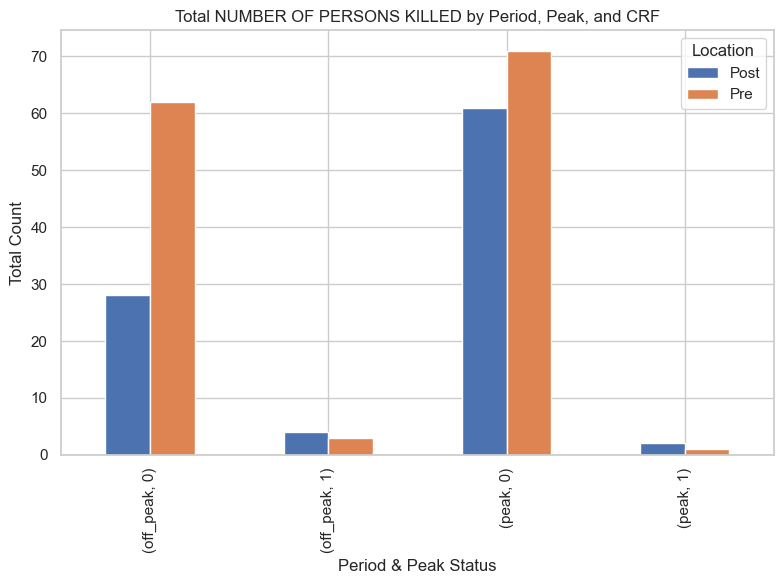

In [27]:
metric = 'NUMBER OF PERSONS KILLED'
df_plot_pivot = grouped.pivot_table(
    index=['peak_status', 'in_crf'],
    columns='period',
    values=metric,
    aggfunc='sum'
)
df_plot_pivot.columns = ['Post', 'Pre']

df_plot_pivot.plot(kind='bar', figsize=(8, 6))
plt.title(f'Total {metric} by Period, Peak, and CRF')
plt.ylabel("Total Count")
plt.xlabel("Period & Peak Status")
plt.legend(title='Location')
plt.tight_layout()
plt.show()


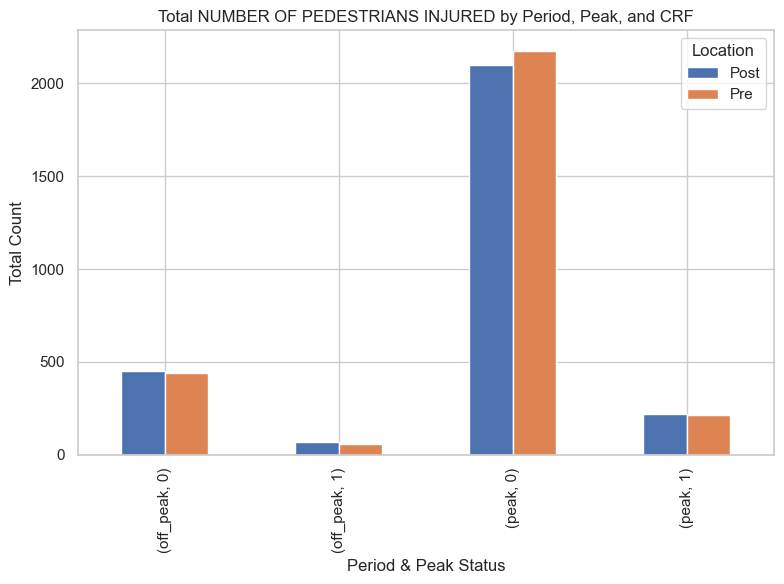

In [28]:
metric = 'NUMBER OF PEDESTRIANS INJURED'
df_plot_pivot = grouped.pivot_table(
    index=['peak_status', 'in_crf'],
    columns='period',
    values=metric,
    aggfunc='sum'
)
df_plot_pivot.columns = ['Post', 'Pre']

df_plot_pivot.plot(kind='bar', figsize=(8, 6))
plt.title(f'Total {metric} by Period, Peak, and CRF')
plt.ylabel("Total Count")
plt.xlabel("Period & Peak Status")
plt.legend(title='Location')
plt.tight_layout()
plt.show()

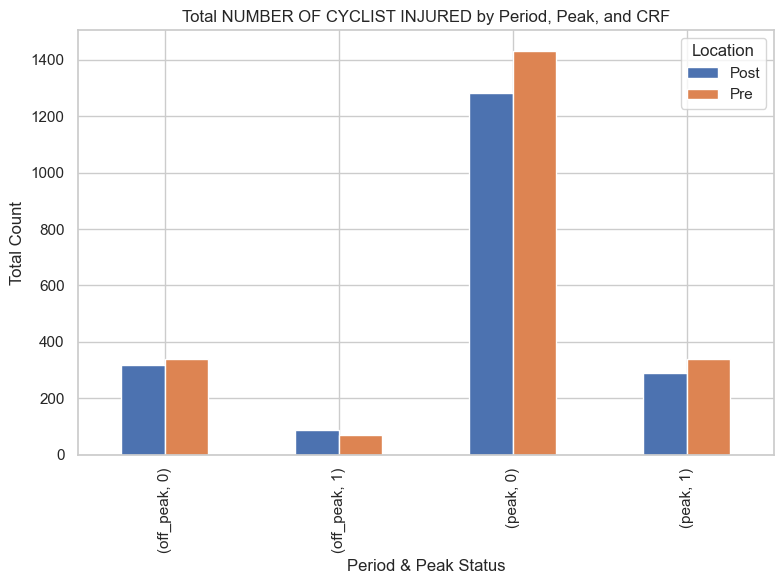

In [29]:
metric = 'NUMBER OF CYCLIST INJURED'
df_plot_pivot = grouped.pivot_table(
    index=['peak_status', 'in_crf'],
    columns='period',
    values=metric,
    aggfunc='sum'
)
df_plot_pivot.columns = ['Post', 'Pre']

df_plot_pivot.plot(kind='bar', figsize=(8, 6))
plt.title(f'Total {metric} by Period, Peak, and CRF')
plt.ylabel("Total Count")
plt.xlabel("Period & Peak Status")
plt.legend(title='Location')
plt.tight_layout()
plt.show()

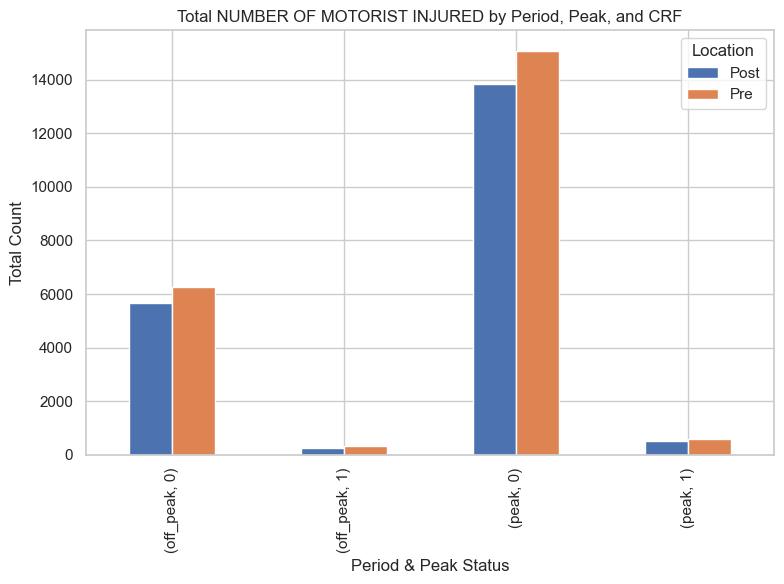

In [30]:
metric = 'NUMBER OF MOTORIST INJURED'
df_plot_pivot = grouped.pivot_table(
    index=['peak_status', 'in_crf'],
    columns='period',
    values=metric,
    aggfunc='sum'
)
df_plot_pivot.columns = ['Post', 'Pre']

df_plot_pivot.plot(kind='bar', figsize=(8, 6))
plt.title(f'Total {metric} by Period, Peak, and CRF')
plt.ylabel("Total Count")
plt.xlabel("Period & Peak Status")
plt.legend(title='Location')
plt.tight_layout()
plt.show()


In [31]:
# Whether the number of accident casualties across the city changes after the policy is implemented.
from scipy.stats import ttest_ind
injury_cols = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

for col in injury_cols:
    pre_vals = df_crash_with_crf[df_crash_with_crf['period'] == 'pre'][col].dropna()
    post_vals = df_crash_with_crf[df_crash_with_crf['period'] == 'post'][col].dropna()
    
    t_stat, p_val = ttest_ind(pre_vals, post_vals, equal_var=False)
    
    print(f"{col}:")
    print(f"  Mean: pre = {pre_vals.mean():.4f}, post = {post_vals.mean():.4f}")
    print(f"  p-value = {p_val:.4e}")
    print("-" * 40)

NUMBER OF PERSONS INJURED:
  Mean: pre = 0.5594, post = 0.5510
  p-value = 1.4392e-01
----------------------------------------
NUMBER OF PERSONS KILLED:
  Mean: pre = 0.0027, post = 0.0020
  p-value = 3.8250e-02
----------------------------------------
NUMBER OF PEDESTRIANS INJURED:
  Mean: pre = 0.0573, post = 0.0607
  p-value = 3.4831e-02
----------------------------------------
NUMBER OF CYCLIST INJURED:
  Mean: pre = 0.0433, post = 0.0424
  p-value = 4.9047e-01
----------------------------------------
NUMBER OF MOTORIST INJURED:
  Mean: pre = 0.4421, post = 0.4345
  p-value = 1.7965e-01
----------------------------------------


In [32]:
# Focus on areas where policies have a direct impact and see whether casualties have decreased.
from scipy.stats import ttest_ind

injury_cols = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

df_crf_only = df_crash_with_crf[df_crash_with_crf['in_crf'] == 1]

for col in injury_cols:
    pre_vals = df_crf_only[df_crf_only['period'] == 'pre'][col].dropna()
    post_vals = df_crf_only[df_crf_only['period'] == 'post'][col].dropna()
    
    t_stat, p_val = ttest_ind(pre_vals, post_vals, equal_var=False)
    
    print(f"{col}:")
    print(f"  Mean: pre = {pre_vals.mean():.4f}, post = {post_vals.mean():.4f}")
    print(f"  p-value = {p_val:.4e}")
    print("-" * 40)


NUMBER OF PERSONS INJURED:
  Mean: pre = 0.4442, post = 0.4499
  p-value = 7.2704e-01
----------------------------------------
NUMBER OF PERSONS KILLED:
  Mean: pre = 0.0011, post = 0.0018
  p-value = 4.1028e-01
----------------------------------------
NUMBER OF PEDESTRIANS INJURED:
  Mean: pre = 0.0735, post = 0.0872
  p-value = 4.9704e-02
----------------------------------------
NUMBER OF CYCLIST INJURED:
  Mean: pre = 0.1087, post = 0.1139
  p-value = 4.9191e-01
----------------------------------------
NUMBER OF MOTORIST INJURED:
  Mean: pre = 0.2467, post = 0.2360
  p-value = 4.6104e-01
----------------------------------------


In [33]:
# As a control group, see if there are any "spillover effects" or other trends in non-policy areas.
injury_cols = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

df_crf_only = df_crash_with_crf[df_crash_with_crf['in_crf'] == 0]

for col in injury_cols:
    pre_vals = df_crf_only[df_crf_only['period'] == 'pre'][col].dropna()
    post_vals = df_crf_only[df_crf_only['period'] == 'post'][col].dropna()
    
    t_stat, p_val = ttest_ind(pre_vals, post_vals, equal_var=False)
    
    print(f"{col}:")
    print(f"  Mean: pre = {pre_vals.mean():.4f}, post = {post_vals.mean():.4f}")
    print(f"  p-value = {p_val:.4e}")
    print("-" * 40)


NUMBER OF PERSONS INJURED:
  Mean: pre = 0.5686, post = 0.5587
  p-value = 9.9562e-02
----------------------------------------
NUMBER OF PERSONS KILLED:
  Mean: pre = 0.0029, post = 0.0020
  p-value = 2.1780e-02
----------------------------------------
NUMBER OF PEDESTRIANS INJURED:
  Mean: pre = 0.0560, post = 0.0587
  p-value = 1.0390e-01
----------------------------------------
NUMBER OF CYCLIST INJURED:
  Mean: pre = 0.0380, post = 0.0369
  p-value = 3.9979e-01
----------------------------------------
NUMBER OF MOTORIST INJURED:
  Mean: pre = 0.4578, post = 0.4496
  p-value = 1.6931e-01
----------------------------------------


In [34]:
# The t-test is only performed before and after the peak period in the charging area.
cols_needed = [
    'period', 'peak_status', 'in_crf',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED',
    'NUMBER OF MOTORIST INJURED'
]

df_small = df_crash_with_crf[cols_needed].copy()

df_crf_peak = df_small[(df_small['in_crf'] == 1) & (df_small['peak_status'] == 'peak')]

for col in injury_cols:
    pre_vals = df_crf_peak[df_crf_peak['period'] == 'pre'][col].dropna()
    post_vals = df_crf_peak[df_crf_peak['period'] == 'post'][col].dropna()

    t_stat, p_val = ttest_ind(pre_vals, post_vals, equal_var=False)

    print(f"{col}:")
    print(f"  Mean: pre = {pre_vals.mean():.4f}, post = {post_vals.mean():.4f}")
    print(f"  p-value = {p_val:.4e}")
    print("-" * 40)

NUMBER OF PERSONS INJURED:
  Mean: pre = 0.4422, post = 0.4346
  p-value = 6.7807e-01
----------------------------------------
NUMBER OF PERSONS KILLED:
  Mean: pre = 0.0004, post = 0.0008
  p-value = 5.1678e-01
----------------------------------------
NUMBER OF PEDESTRIANS INJURED:
  Mean: pre = 0.0808, post = 0.0909
  p-value = 2.1705e-01
----------------------------------------
NUMBER OF CYCLIST INJURED:
  Mean: pre = 0.1264, post = 0.1188
  p-value = 4.0864e-01
----------------------------------------
NUMBER OF MOTORIST INJURED:
  Mean: pre = 0.2196, post = 0.2093
  p-value = 5.2028e-01
----------------------------------------


In [35]:
df_crash_with_crf = df_crash_with_crf.sort_values(by=['CRASH DATE', 'CRASH TIME']).reset_index(drop=True)
df_crash_with_crf

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE_TYPE,dayofweek,hour,peak_status,in_crf,period
0,2024-01-01,0:00,QUEENS,11434.0,40.690342,-73.782430,"(40.690342, -73.78243)",1.0,0.0,0,...,0,1,0,4692165,Sedan,0,0,off_peak,0,None
1,2024-01-01,0:00,QUEENS,11434.0,40.690342,-73.782430,"(40.690342, -73.78243)",1.0,0.0,0,...,0,1,0,4692165,Sedan,0,0,off_peak,0,None
2,2024-01-01,0:00,NaN,NaN,40.628567,-73.888794,"(40.628567, -73.888794)",5.0,0.0,0,...,0,5,0,4692945,Sedan,0,0,off_peak,0,None
3,2024-01-01,0:00,NaN,NaN,40.628567,-73.888794,"(40.628567, -73.888794)",5.0,0.0,0,...,0,5,0,4692945,Sedan,0,0,off_peak,0,None
4,2024-01-01,0:00,NaN,NaN,40.628567,-73.888794,"(40.628567, -73.888794)",5.0,0.0,0,...,0,5,0,4692945,Sedan,0,0,off_peak,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217097,2025-04-25,9:55,QUEENS,11357.0,40.785850,-73.795080,"(40.78585, -73.79508)",1.0,0.0,0,...,0,0,0,4808601,NaN,4,9,peak,0,None
217098,2025-04-25,9:55,BROOKLYN,11220.0,40.638668,-74.006940,"(40.638668, -74.00694)",0.0,0.0,0,...,0,0,0,4808091,Station Wagon/Sport Utility Vehicle,4,9,peak,0,None
217099,2025-04-25,9:55,BROOKLYN,11220.0,40.638668,-74.006940,"(40.638668, -74.00694)",0.0,0.0,0,...,0,0,0,4808091,Box Truck,4,9,peak,0,None
217100,2025-04-25,9:58,MANHATTAN,10016.0,40.742104,-73.977615,"(40.742104, -73.977615)",1.0,0.0,0,...,0,0,0,4808378,Station Wagon/Sport Utility Vehicle,4,9,peak,1,None


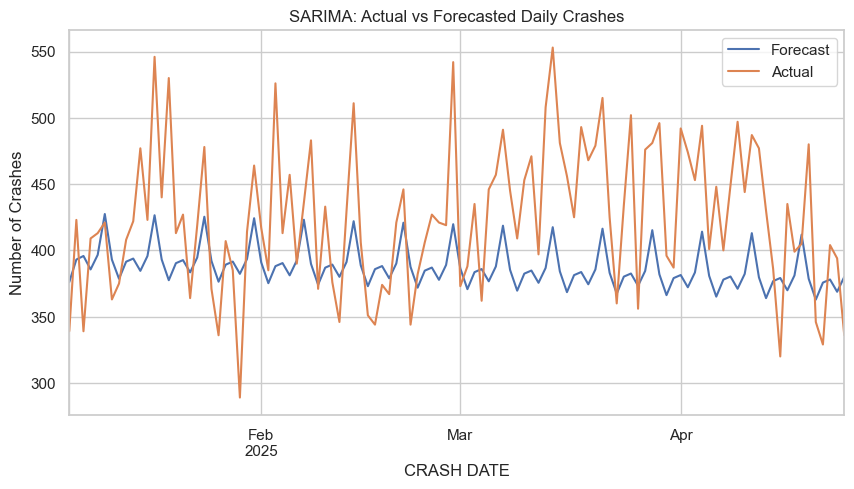

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_series = df_crash_with_crf[df_crash_with_crf['CRASH DATE'] < '2025-01-05'] \
    .groupby('CRASH DATE').size().asfreq('D').fillna(0)

model = SARIMAX(train_series, order=(1,1,1), seasonal_order=(1,1,1,7))
result = model.fit()

forecast = result.predict(start='2025-01-05', end='2025-04-24')

actual = df_crash_with_crf[
    (df_crash_with_crf['CRASH DATE'] >= '2025-01-05') &
    (df_crash_with_crf['CRASH DATE'] <= '2025-04-24')
].groupby('CRASH DATE').size().asfreq('D').fillna(0)

plt.figure(figsize=(10, 5))
forecast.plot(label='Forecast')
actual.plot(label='Actual')
plt.legend()
plt.title("SARIMA: Actual vs Forecasted Daily Crashes")
plt.xlabel("CRASH DATE")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()
